What happens when bears attack for a week?

MIN_PCT_LOSS = Minimum Percentage point drop over the week.

In [1]:
MIN_PCT_LOSS = -3.9

In [2]:
import numpy as np
import pandas as pd

from scipy import stats

import datetime
from pandas.tseries.frequencies import to_offset

import niftyutils
from niftyutils import load_nifty_data

import matplotlib.pyplot as plt
import mplfinance as fplt

In [3]:
start_date = datetime.datetime(2005,8,1)
end_date = datetime.datetime(2020,8,29)
nifty_data = load_nifty_data(start_date,end_date)

In [4]:
weekly_nifty_data = nifty_data.resample('W').agg(niftyutils.OHLC_CONVERSION_DICT)
weekly_nifty_data.index = weekly_nifty_data.index - to_offset('6D')
weekly_nifty_data.tail(3)

,Open,High,Low,Close,Volume
Date,,,,,
2020-08-10,11270.25,11373.60,11111.45,11178.4,2.895408e+09
2020-08-17,11248.90,11460.35,11144.50,11371.6,3.299731e+09
2020-08-24,11412.00,11686.05,11410.65,11647.6,3.441270e+09


In [5]:
weekly_returns = (weekly_nifty_data['Close']/weekly_nifty_data['Close'].shift(1) - 1)*100
weekly_returns = weekly_returns.dropna()

In [6]:
bear_weeks = weekly_returns[(weekly_returns <= MIN_PCT_LOSS)]

In [7]:
bear_weeks.sample(3)

Date
2009-01-05   -5.702798
2008-09-22   -6.124492
2007-10-15   -3.922995
Name: Close, dtype: float64

In [8]:
pct_change_after_bear_week = []
for ix, pct_chage in bear_weeks.iteritems():
    pct_change_by_week = []
    for i in range(1,5):
        after_ix = weekly_returns.index.get_loc(ix) + i
        ret = weekly_returns[after_ix]
        pct_change_by_week.append(ret)
    
    pct_change_after_bear_week.append(pct_change_by_week)

In [9]:
bear_week_study_data = pd.DataFrame(pct_change_after_bear_week, columns=['1st','2nd','3rd','4th'],
                                                  index = bear_weeks.index)
bear_week_study_data['Bear Week'] = bear_weeks.values
bear_week_study_data = bear_week_study_data[['Bear Week','1st','2nd','3rd','4th']]

In [10]:
bear_week_study_data.describe()

,Bear Week,1st,2nd,3rd,4th
count,52.000000,52.000000,52.000000,52.000000,52.000000
mean,-6.176278,0.407333,-0.942204,0.404334,0.607201
std,2.516537,5.612513,5.118550,5.675585,5.250710
min,-15.949713,-15.949713,-15.949713,-15.949713,-15.949713
25%,-6.688504,-2.211710,-3.715660,-2.727129,-3.023497
50%,-5.343472,0.916525,-1.172267,1.069195,0.664616
75%,-4.623283,3.347419,3.071829,3.210089,3.591637
max,-3.922995,12.718029,11.671827,12.718029,12.718029


<AxesSubplot:>

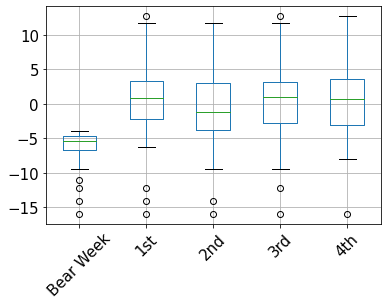

In [11]:
bear_week_study_data.boxplot(grid=True, rot=45, fontsize=15)

In [13]:
bear_week_study_data[bear_week_study_data['Bear Week'].between(-6.0,-3.9)].describe()

,Bear Week,1st,2nd,3rd,4th
count,35.000000,35.000000,35.000000,35.000000,35.000000
mean,-4.899170,0.736216,-0.150181,0.273278,1.012367
std,0.600593,4.397055,3.838364,4.982793,4.593932
min,-5.969243,-14.099206,-6.268388,-15.949713,-7.980516
25%,-5.343472,-2.085464,-3.434382,-2.251882,-1.897780
50%,-4.938891,1.503572,-1.102685,1.068165,1.047214
75%,-4.377513,3.164474,3.214824,2.936903,3.986204
max,-3.922995,9.337910,7.220730,10.744376,11.671827
